In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los datos
df = pd.read_csv(
    'https://raw.githubusercontent.com/Haroldgio28/Probabilidad_de_impago/main/data/case%202/Churn%20Modeling.csv'
    )
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8957,8958,15787825,Okwudiliolisa,585,Germany,Male,37,6,152496.82,1,1,1,99907.29,0
4274,4275,15690021,Martin,502,Germany,Female,42,0,132002.70,1,0,1,28204.98,1
6295,6296,15621550,Hung,535,Spain,Female,50,1,140292.58,3,0,0,69531.22,1
304,305,15812191,Brennan,553,France,Male,33,4,118082.89,1,0,0,94440.45,0
1038,1039,15581479,Archer,523,France,Male,30,1,83181.29,1,1,1,138176.78,0
2708,2709,15667190,Yuan,630,Spain,Female,21,1,85818.18,1,1,1,133102.30,0
5019,5020,15584113,Pratt,823,Germany,Female,53,4,124954.94,1,0,1,131259.60,1
214,215,15785542,Kornilova,572,Germany,Male,26,4,118287.01,2,0,0,60427.30,0
479,480,15797736,Smith,658,France,Male,29,4,80262.60,1,1,1,20612.82,0
4336,4337,15771742,Boyle,580,Germany,Male,38,9,115442.19,2,1,0,128481.50,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


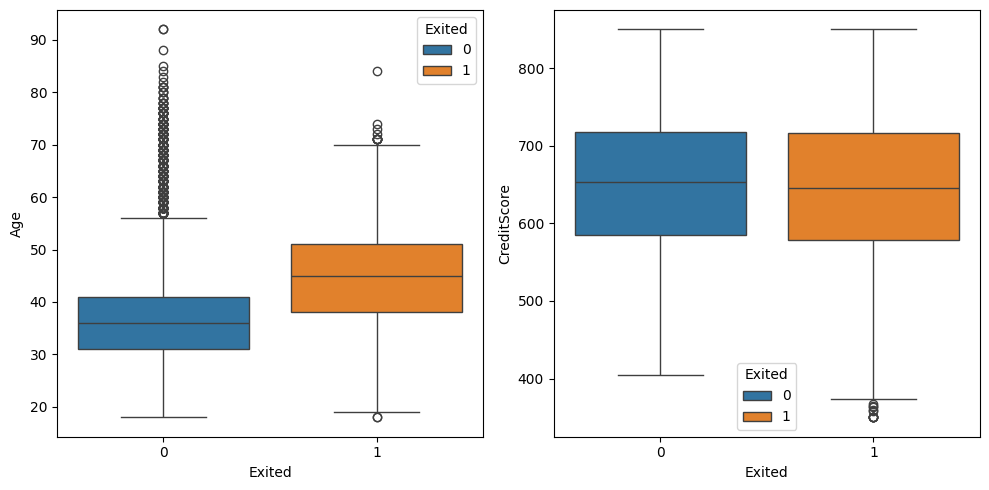

In [ ]:
fig, axes = plt.subplots(
    1,2,
    figsize = (10,5),
    )

sns.boxplot(
    data = df,
    y = 'Age',
    x = 'Exited',
    hue='Exited',
    ax = axes[0],
)

sns.boxplot(
    data = df,
    y = 'CreditScore',
    x = 'Exited',
    hue='Exited',
    ax = axes[1],
)

plt.tight_layout()

# **Ingeniería de características - Feature Engineering**

- Discretización: Numérica a categórica

Ejemplo: Edad

In [ ]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

# Churn General

In [ ]:
df['Exited'].unique()

array([1, 0])

In [ ]:
df['Exited'].sum()

2037

In [ ]:
len(df)

10000

In [ ]:
df['Exited'].sum()/len(df)*100

20.369999999999997

In [ ]:
probabilidad_general = df['Exited'].mean()*100
probabilidad_general

20.369999999999997

# Discretización

In [ ]:
# Joven 18 a 28 años, adulto > 28

#Función anónima
df['flag_joven_adulto'] = df['Age'].apply(
    lambda edad: 'Joven' if isinstance(edad, int) and 18 <= edad <= 28
      else ('Adulto' if isinstance(edad, int) and edad > 28
              else ('No Valido' if isinstance(edad, int)
                else 'Valor no valido'))
)

df[['Age','flag_joven_adulto']].sample(10)

,Age,flag_joven_adulto
3076,43,Adulto
9508,26,Joven
8905,36,Adulto
3580,41,Adulto
196,32,Adulto
6616,33,Adulto
6905,35,Adulto
6847,30,Adulto
4596,38,Adulto
3246,57,Adulto


In [ ]:
a = 2
b = 3

print(a + b)

5


In [ ]:
def sumar(a,b):
  result = a + b
  return result

In [ ]:
a = int(input('Ingrese un número:'))
b = int(input('Ingrese un número:'))
print("El resultado de sumar los dos números es: ",sumar(a,b))

Ingrese un número:10
Ingrese un número:25
El resultado de sumar los dos números es:  35


In [ ]:
#definición Textual
def variable_joven_adulto(edad):
  if type(edad)== int:
    if 18 <= edad <= 28:
      return 'Joven'
    elif edad > 28:
      return 'Adulto'
    else: 'No Valido'
  else:
    return 'Valor no valido'

In [ ]:
variable_joven_adulto('Hola')

'Valor no valido'

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,flag_joven_adulto
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adulto
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adulto
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adulto
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adulto
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adulto


In [ ]:
df['flag_joven_adulto']= df['Age'].apply(variable_joven_adulto)

df[['Age','flag_joven_adulto']].sample(10)

df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,flag_joven_adulto
3028,3029,15675185,Chuang,697,Germany,Female,48,2,108128.96,2,1,1,103944.37,0,Adulto
3638,3639,15684367,Chigbogu,555,Spain,Male,27,5,0.00,2,0,0,96398.51,0,Joven
3145,3146,15775590,Mackay,482,Germany,Female,48,2,69329.47,1,0,0,102640.52,1,Adulto
1673,1674,15780835,Liang,652,Germany,Female,26,1,131908.35,1,1,1,179269.79,0,Joven
7622,7623,15796413,Green,794,France,Male,46,6,0.00,2,1,0,195325.74,0,Adulto
1799,1800,15612776,McKay,850,Spain,Female,39,10,0.00,2,1,1,143030.09,0,Adulto
5057,5058,15606386,Wang,753,Germany,Female,46,3,111512.75,3,1,0,159576.75,1,Adulto
2898,2899,15624510,Tien,696,France,Male,52,6,139781.06,1,1,0,27445.40,1,Adulto
7224,7225,15609823,Chieloka,751,Spain,Female,34,8,127095.14,2,0,0,479.54,0,Adulto
620,621,15682585,Guerra,593,France,Male,35,9,114193.24,1,1,0,71154.10,0,Adulto


In [ ]:
df['flag_joven_adulto'].value_counts()

flag_joven_adulto
Adulto    8707
Joven     1293
Name: count, dtype: int64

In [ ]:
df.groupby('flag_joven_adulto')['Exited'].sum()

flag_joven_adulto
Adulto    1941
Joven       96
Name: Exited, dtype: int64

In [ ]:
df.groupby('flag_joven_adulto')['Exited'].mean()*100

flag_joven_adulto
Adulto    22.292408
Joven      7.424594
Name: Exited, dtype: float64

In [ ]:
generation_ranges = {
    'Greatest Generation' : (1900,1924),
    'Silent Generation' : (1925,1945),
    'Baby Boomer' : (1946,1964),
    'Generation X' : (1965,1980),
    'Millennials' : (1981,1996),
    'Generation Z' : (1997,2012),
    'Generation Alfa':(2013,2024)
}

In [ ]:
generation_ranges.values()

dict_values([(1900, 1924), (1925, 1945), (1946, 1964), (1965, 1980), (1981, 1996), (1997, 2012), -11])

In [ ]:
from datetime import datetime

In [ ]:
datetime.now().year

2024

In [ ]:
lambda age, ranges: (lambda current_year, birth_year: next((generation for generation, (start_year, end_year) in ranges.items() if start_year <= birth_year <= end_year), 'Unknown'))(datetime.now().year, datetime.now().year - age)

In [ ]:
def categorize_generation(age, ranges):
  current_year = datetime.now().year
  birth_year = current_year - age

  for generation, (start_year, end_year) in ranges.items():
    if start_year <= birth_year <= end_year:
      return generation
  return 'Unknown'

In [ ]:
categorize_generation(28,generation_ranges)

'Millennials'

In [ ]:
df['Generation'] = df['Age'].apply(lambda x: categorize_generation(x,generation_ranges) )

df[['Age','Generation']].head(10)

,Age,Generation
0,42,Millennials
1,41,Millennials
2,42,Millennials
3,39,Millennials
4,43,Millennials
5,44,Generation X
6,50,Generation X
7,29,Millennials
8,44,Generation X
9,27,Generation Z


In [ ]:
datetime.now().year

2024

In [ ]:
df['Generation'].value_counts().sort_index()

Generation
Baby Boomer           507
Generation X         2071
Generation Z         1020
Millennials          6383
Silent Generation      19
Name: count, dtype: int64

In [ ]:
df.groupby('Generation')['Exited'].sum().sort_index()

Generation
Baby Boomer          146
Generation X         970
Generation Z          73
Millennials          847
Silent Generation      1
Name: Exited, dtype: int64

In [ ]:
df.groupby('Generation')['Exited'].mean().sort_index()*100

Generation
Baby Boomer          28.796844
Generation X         46.837277
Generation Z          7.156863
Millennials          13.269622
Silent Generation     5.263158
Name: Exited, dtype: float64

In [ ]:
df.groupby('Generation').agg({'Age':['min','max'],'Exited':'mean'})

Age        Exited
                  min max      mean
Generation                         
Baby Boomer        60  78  0.287968
Generation X       44  59  0.468373
Generation Z       18  27  0.071569
Millennials        28  43  0.132696
Silent Generation  79  92  0.052632

<Axes: xlabel='count', ylabel='Generation'>

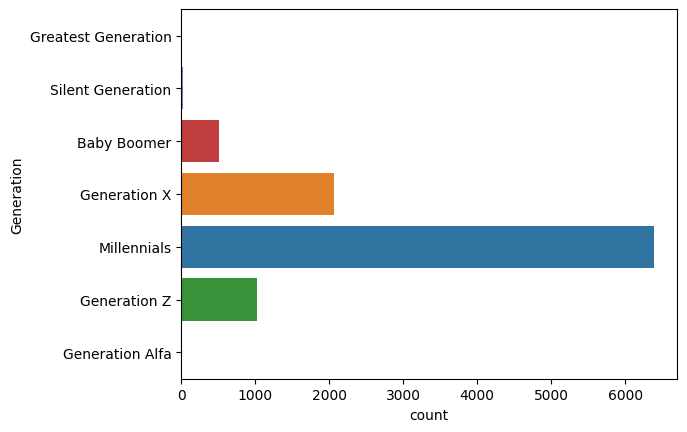

In [ ]:
sns.countplot(
    data = df,
    y = 'Generation',
    hue = 'Generation',
    order = list(generation_ranges.keys())
)

<Axes: ylabel='Generation'>

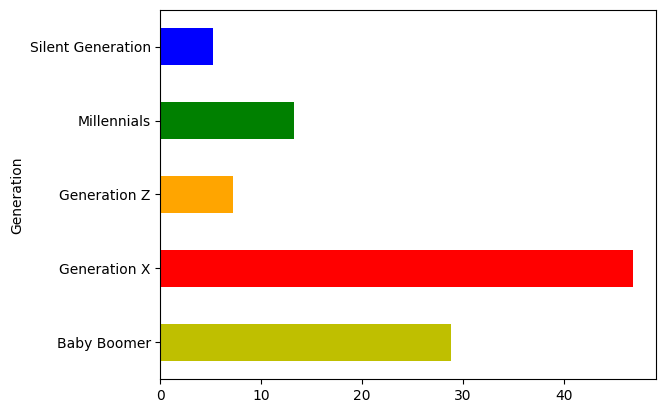

In [ ]:
colors = ['y','red', 'orange', 'green', 'blue', 'purple']


(df.groupby('Generation')['Exited'].mean().sort_index()*100).plot(kind= 'barh',color=colors)

In [ ]:
palette = {
    'Greatest Generation': '#1f77b4',
    'Silent Generation': '#ff7f0e',
    'Baby Boomer': '#2ca02c',
    'Generation X': '#d62728',
    'Millennials': '#9467bd',
    'Generation Z': '#8c564b'
}

In [ ]:
df.groupby('Generation',as_index=False)['Exited'].mean()

,Generation,Exited
0,Baby Boomer,0.287968
1,Generation X,0.468373
2,Generation Z,0.071569
3,Millennials,0.132696
4,Silent Generation,0.052632


In [ ]:
churn = (df.groupby('Generation')['Exited'].mean().sort_index()).reset_index()

In [ ]:
customers = df['Generation'].value_counts().sort_index()

In [ ]:
merge_df = churn.merge(customers,on='Generation')
merge_df['clientes_churn'] = merge_df['Exited']*merge_df['count']
merge_df['impacto_usd'] = merge_df['Exited']*merge_df['count']*1000
merge_df.sort_values('impacto_usd')

,Generation,Exited,count,clientes_churn,impacto_usd
4,Silent Generation,0.052632,19,1.0,1000.0
2,Generation Z,0.071569,1020,73.0,73000.0
0,Baby Boomer,0.287968,507,146.0,146000.0
3,Millennials,0.132696,6383,847.0,847000.0
1,Generation X,0.468373,2071,970.0,970000.0


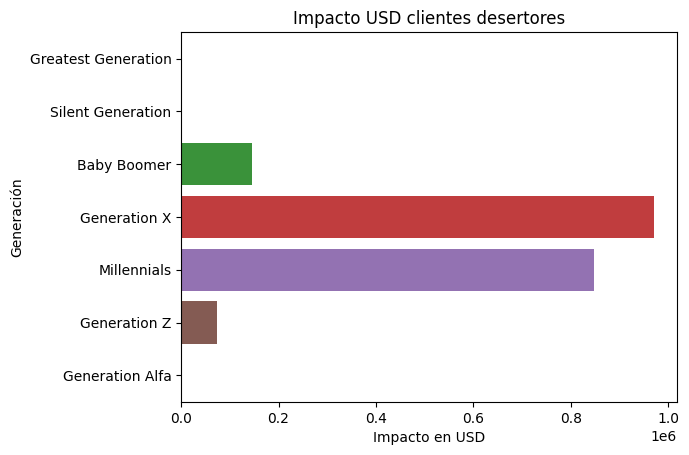

In [ ]:
sns.barplot(
    data=merge_df,
    x='impacto_usd',
    y='Generation',
    hue = 'Generation',
    palette=palette,
    order = list(generation_ranges.keys())
)

plt.ylabel('Generación')
plt.xlabel('Impacto en USD')
plt.title('Impacto USD clientes desertores')
plt.show()

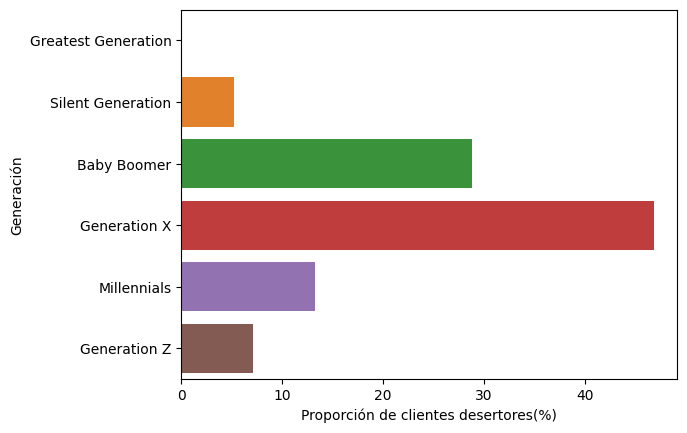

In [ ]:
prob_gen = (df.groupby('Generation')['Exited'].mean().sort_index()*100).reset_index()
gen_order = list(generation_ranges.keys())

sns.barplot(
    data=prob_gen,
    y='Generation',
    x='Exited',
    hue = 'Generation',
    palette=palette,
    order = gen_order
)

plt.ylabel('Generación')
plt.xlabel('Proporción de clientes desertores(%)')
plt.show()

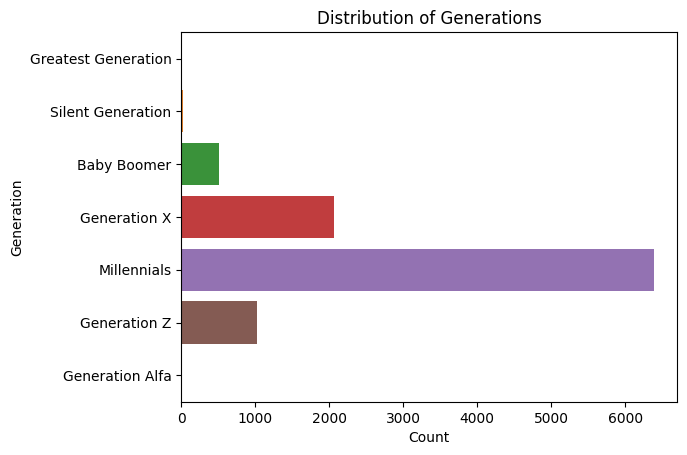

In [ ]:
generation_order = list(generation_ranges.keys())

# Gráfica de conteo de generaciones
sns.countplot(data=df, y='Generation', hue='Generation', order=generation_order, palette=palette)
plt.xlabel('Count')
plt.ylabel('Generation')
plt.title('Distribution of Generations')
plt.show()

# Análisis de probabilidad de churn por sexo

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.groupby('Gender')['Exited'].mean()

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

In [ ]:
df.groupby(['Gender','flag_joven_adulto'])['Exited'].mean()

Gender  flag_joven_adulto
Female  Adulto               0.273394
        Joven                0.098472
Male    Adulto               0.180938
        Joven                0.053977
Name: Exited, dtype: float64

In [ ]:
df.groupby(['Gender','flag_joven_adulto'])['Exited'].size()

Gender  flag_joven_adulto
Female  Adulto               3954
        Joven                 589
Male    Adulto               4753
        Joven                 704
Name: Exited, dtype: int64

In [ ]:
df.groupby(['Gender','Generation'])['Exited'].size()

Gender  Generation       
Female  Baby Boomer           232
        Generation X         1021
        Generation Z          470
        Millennials          2811
        Silent Generation       9
Male    Baby Boomer           275
        Generation X         1050
        Generation Z          550
        Millennials          3572
        Silent Generation      10
Name: Exited, dtype: int64

In [ ]:
df.groupby(['Gender','Generation'])['Exited'].mean()

Gender  Generation       
Female  Baby Boomer          0.349138
        Generation X         0.533790
        Generation Z         0.091489
        Millennials          0.166845
        Silent Generation    0.111111
Male    Baby Boomer          0.236364
        Generation X         0.404762
        Generation Z         0.054545
        Millennials          0.105823
        Silent Generation    0.000000
Name: Exited, dtype: float64

<Axes: ylabel='Gender,Generation'>

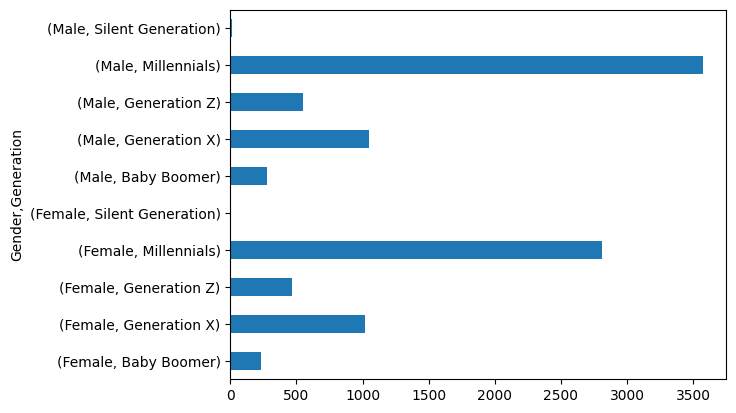

In [ ]:
df.groupby(['Gender','Generation'])['Exited'].size().plot(kind='barh')

<Axes: ylabel='Gender,Generation'>

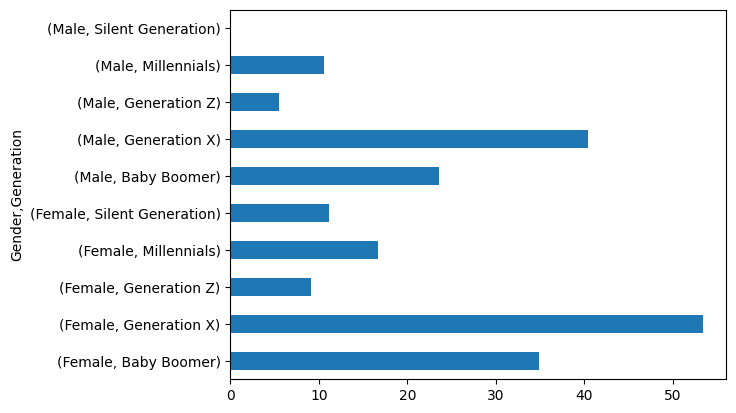

In [ ]:
(df.groupby(['Gender','Generation'])['Exited'].mean()*100).plot(kind='barh')

<Axes: ylabel='Geography'>

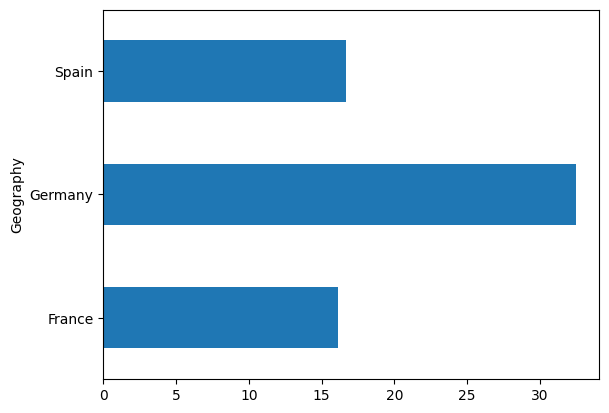

In [ ]:
(df.groupby(['Geography'])['Exited'].mean()*100).plot(kind='barh')

<Axes: ylabel='Gender,Geography,Generation'>

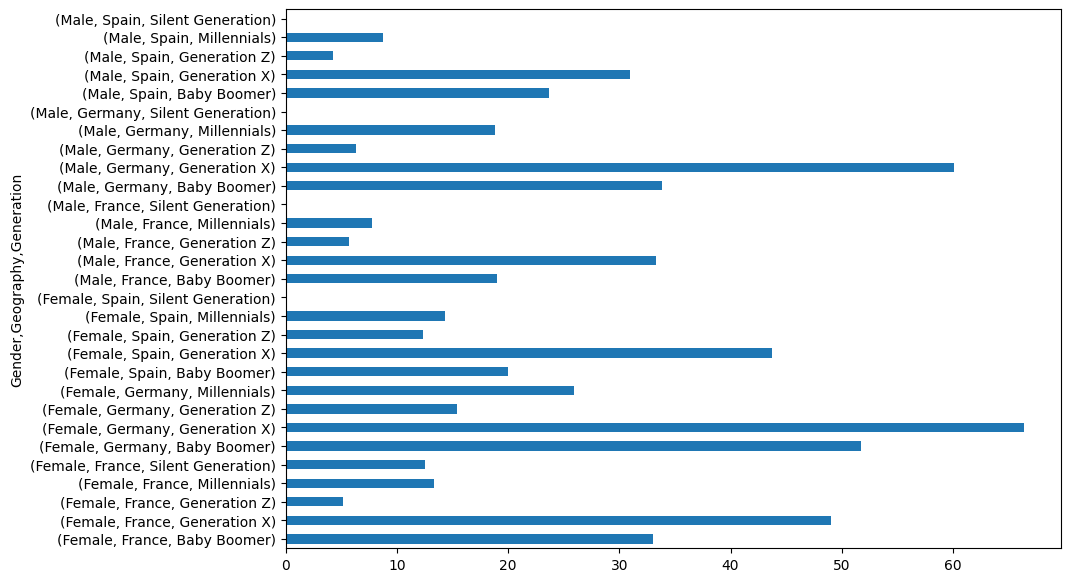

In [ ]:
(df.groupby(['Gender','Geography','Generation'])['Exited'].mean()*100).plot(kind='barh', figsize=(10,7))

<Axes: ylabel='Gender,HasCrCard,Geography,Generation'>

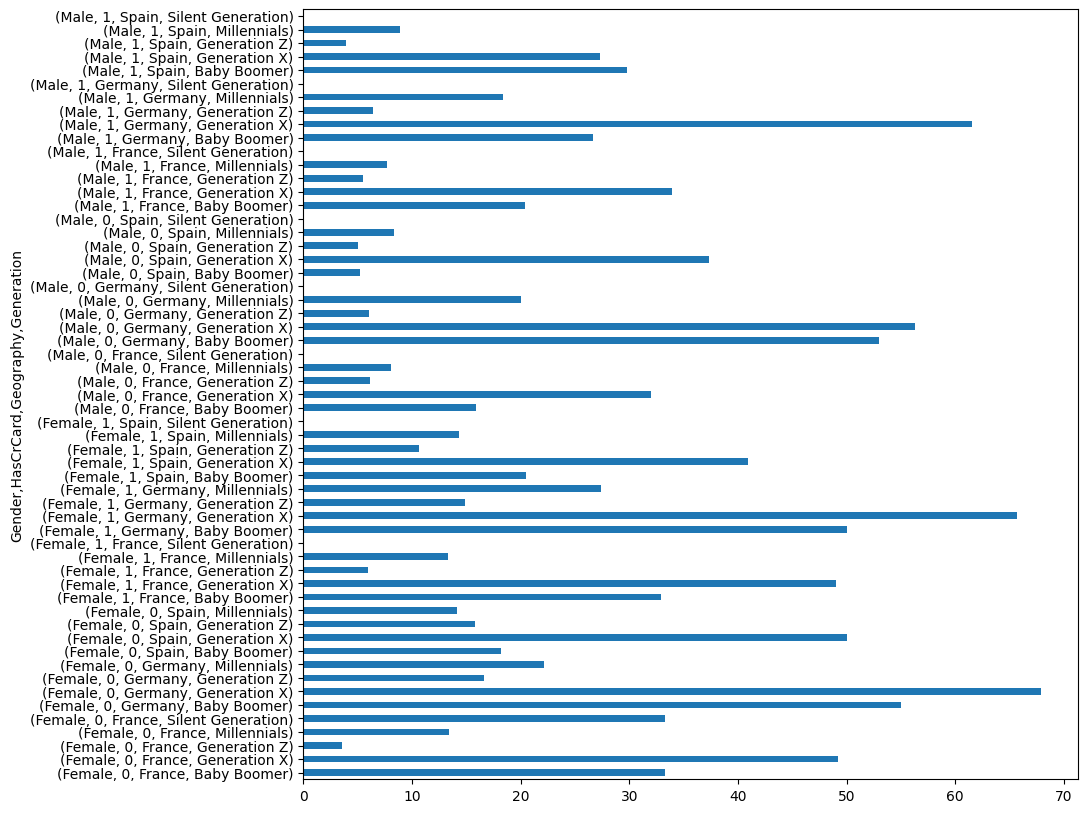

In [ ]:
(df.groupby(['Gender','HasCrCard','Geography','Generation'])['Exited'].mean()*100).plot(kind='barh', figsize=(10,10))

In [ ]:
(df.groupby(['Gender','HasCrCard','Geography','Generation'])['Exited'].mean()).reset_index().sort_values('Exited', ascending= False).head(20)

,Gender,HasCrCard,Geography,Generation,Exited
6,Female,0,Germany,Generation X,0.679245
19,Female,1,Germany,Generation X,0.656388
48,Male,1,Germany,Generation X,0.615741
33,Male,0,Germany,Generation X,0.563218
5,Female,0,Germany,Baby Boomer,0.550000
32,Male,0,Germany,Baby Boomer,0.529412
18,Female,1,Germany,Baby Boomer,0.500000
10,Female,0,Spain,Generation X,0.500000
1,Female,0,France,Generation X,0.492537
14,Female,1,France,Generation X,0.490000


In [ ]:
(df.groupby(['Gender','HasCrCard','Geography','Generation']).agg({'Exited':['mean','count']})).reset_index()

Gender HasCrCard Geography         Generation    Exited      
                                                       mean count
0   Female         0    France        Baby Boomer  0.333333    36
1   Female         0    France       Generation X  0.492537   134
2   Female         0    France       Generation Z  0.035294    85
3   Female         0    France        Millennials  0.134118   425
4   Female         0    France  Silent Generation  0.333333     3
5   Female         0   Germany        Baby Boomer  0.550000    20
6   Female         0   Germany       Generation X  0.679245   106
7   Female         0   Germany       Generation Z  0.166667    30
8   Female         0   Germany        Millennials  0.221649   194
9   Female         0     Spain        Baby Boomer  0.181818    11
10  Female         0     Spain       Generation X  0.500000    78
11  Female         0     Spain       Generation Z  0.157895    38
12  Female         0     Spain        Millennials  0.141361   191
13  Female         1    France        Baby Boomer  0.329545    88
14  Female         1    France       Generation X  0.490000   300
15  Female         1    France       Generation Z  0.059524   168
16  Female         1    France        Millennials  0.132743  1017
17  Female         1    France  Silent Generation  0.000000     5
18  Female         1   Germany        Baby Boomer  0.500000    38
19  Female         1   Germany       Generation X  0.656388   227
20  Female         1   Germany       Generation Z  0.148649    74
21  Female         1   Germany        Millennials  0.273810   504
22  Female         1     Spain        Baby Boomer  0.205128    39
23  Female         1     Spain       Generation X  0.409091   176
24  Female         1     Spain       Generation Z  0.106667    75
25  Female         1     Spain        Millennials  0.143750   480
26  Female         1     Spain  Silent Generation  0.000000     1
27    Male         0    France        Baby Boomer  0.159091    44
28    Male         0    France       Generation X  0.320261   153
29    Male         0    France       Generation Z  0.060976    82
30    Male         0    France        Millennials  0.080709   508
31    Male         0    France  Silent Generation  0.000000     1
32    Male         0   Germany        Baby Boomer  0.529412    17
33    Male         0   Germany       Generation X  0.563218    87
34    Male         0   Germany       Generation Z  0.060606    33
35    Male         0   Germany        Millennials  0.200000   230
36    Male         0   Germany  Silent Generation  0.000000     1
37    Male         0     Spain        Baby Boomer  0.052632    19
38    Male         0     Spain       Generation X  0.373626    91
39    Male         0     Spain       Generation Z  0.050000    40
40    Male         0     Spain        Millennials  0.083624   287
41    Male         0     Spain  Silent Generation  0.000000     1
42    Male         1    France        Baby Boomer  0.204301    93
43    Male         1    France       Generation X  0.339181   342
44    Male         1    France       Generation Z  0.055000   200
45    Male         1    France        Millennials  0.076923  1326
46    Male         1    France  Silent Generation  0.000000     4
47    Male         1   Germany        Baby Boomer  0.266667    45
48    Male         1   Germany       Generation X  0.615741   216
49    Male         1   Germany       Generation Z  0.064516    93
50    Male         1   Germany        Millennials  0.184122   592
51    Male         1   Germany  Silent Generation  0.000000     2
52    Male         1     Spain        Baby Boomer  0.298246    57
53    Male         1     Spain       Generation X  0.273292   161
54    Male         1     Spain       Generation Z  0.039216   102
55    Male         1     Spain        Millennials  0.089030   629
56    Male         1     Spain  Silent Generation  0.000000     1

# Relación edad y score crediticio

In [ ]:
df.groupby('Generation')['CreditScore'].mean()

Generation
Baby Boomer          652.386588
Generation X         646.783679
Generation Z         648.973529
Millennials          651.744478
Silent Generation    684.263158
Name: CreditScore, dtype: float64

<Axes: xlabel='CreditScore', ylabel='Generation'>

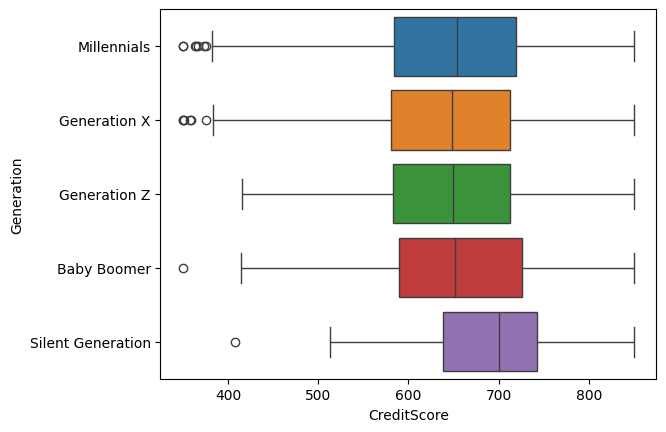

In [ ]:
sns.boxplot(
    data=df,
    x = 'CreditScore',
    y = 'Generation',
    hue = 'Generation'
)